In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [3]:
sys.path.append('/data/jls/cyanide/')
from cannon_ages import *
model = tc.CannonModel.read(
    '/data/jls/GaiaDR2/spectro/lamost_cannon/lamost.cannon')

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/data/jls/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
rave = tc.CannonModel.read('/data/jls/cyanide/outputs/aspcap_calibrated_candn_h_model_age_phot_output.pkl')

(3850.0, 5800.0)

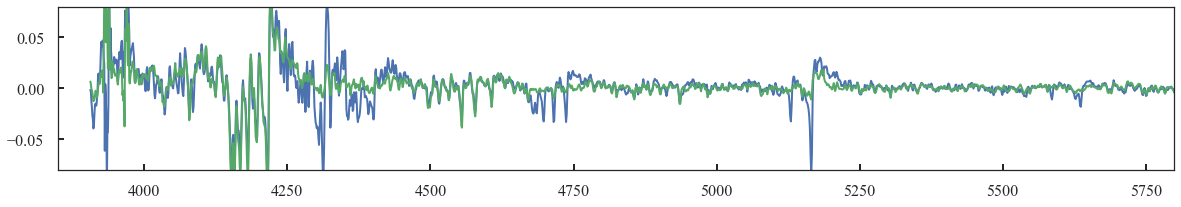

In [5]:
plt.figure(figsize=[20.,3.])
# plt.plot(model.dispersion,(model.theta.T[0]-1.)*0.4)
plt.plot(model.dispersion,model.theta.T[5])
# plt.plot(rave.dispersion,rave.theta.T[5])
plt.plot(model.dispersion,model.theta.T[6])
# plt.plot(model.dispersion,model.theta.T[7])
# plt.plot(rave.dispersion,rave.theta.T[6])
# plt.plot(model.dispersion,model.theta.T[5]-model.theta.T[6])
# plt.plot(rave.dispersion,rave.theta.T[5]-rave.theta.T[6])
plt.ylim(-0.08,0.08)
# plt.ylim(-0.03,0.03)
plt.xlim(3850.,5800.)
# plt.xlim(3850.,9000.)

In [6]:
from astropy.table import Table
fldr = '/data/jls/GaiaDR2/spectro/lamost_cannon/'
labelled_set = pd.read_hdf(fldr + 'training_data_pruned.hdf5')
# [['TEFF','LOGG','M_H','ALPHA_M','C_M','N_M','AK']].astype(np.float64)
# labelled_set = Table.from_pandas(labelled_set)
test = np.load(fldr + 'test.npy')
cov = np.load(fldr + 'test_cov.npy')
flux = np.load(fldr + 'training_flux_pruned.npy')
ivar = np.load(fldr + 'training_ivar_pruned.npy')

In [7]:
lamost = pd.read_hdf('/data/jls/GaiaDR2/spectro/LAMOST_input.hdf5')

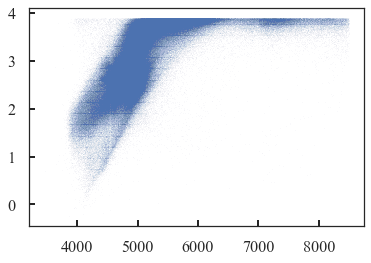

In [8]:
plt.plot(lamost.teff[lamost.logg<3.9],lamost.logg[lamost.logg<3.9],'.',ms=0.3)

In [9]:
snr = np.nanmedian(np.sqrt(ivar)*flux, axis=1)

In [10]:
len(snr)

19882

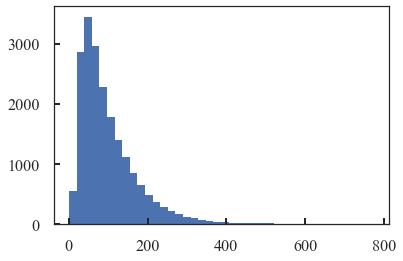

In [11]:
plt.hist(snr,bins=40);

In [12]:
from matplotlib.colors import LogNorm

In [57]:
fltr = (m.TEFF>4000.)&(m.TEFF<5250.)&(m.LOGG>1.)&(m.LOGG<3.3)&(m.M_H>-1.5)&(m.M_H<0.5)

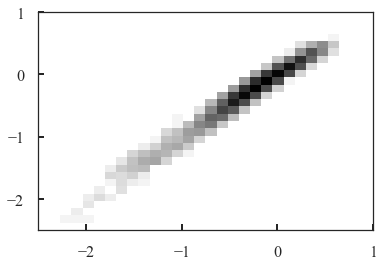

In [13]:
plt.hist2d(test.T[2],
           labelled_set.M_H,
           bins=30,range=[[-2.5,1.],[-2.5,1.]],norm=LogNorm());

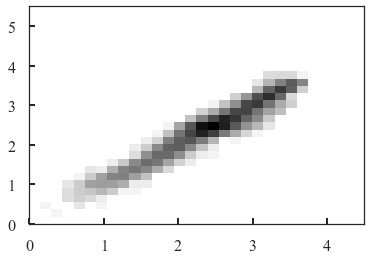

In [14]:
plt.hist2d(test.T[1],labelled_set['LOGG'],bins=30,range=[[0.,4.5],[0.,5.5]],norm=LogNorm());

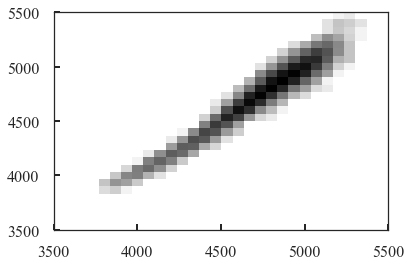

In [15]:
plt.hist2d(test.T[0],labelled_set['TEFF'],bins=30,range=[[3500.,5500.],[3500.,5500.]],norm=LogNorm());

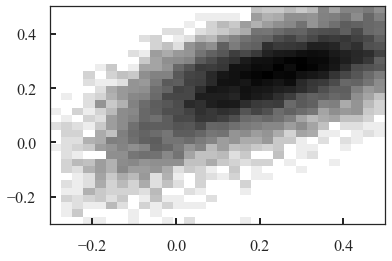

In [16]:
plt.hist2d(test.T[5],labelled_set['N_M'],bins=30,range=[[-0.3,0.5],[-0.3,0.5]],norm=LogNorm());

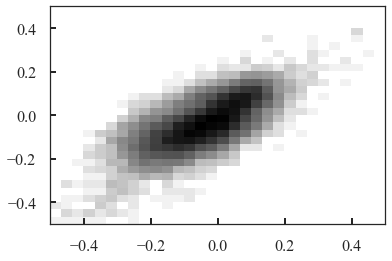

In [17]:
plt.hist2d(test.T[4],labelled_set['C_M'],bins=30,range=[[-0.5,0.5],[-0.5,0.5]],norm=LogNorm());

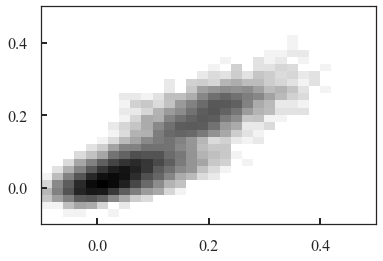

In [18]:
plt.hist2d(test.T[3],labelled_set['ALPHA_M'],bins=30,range=[[-0.1,0.5],[-0.1,0.5]],norm=LogNorm());

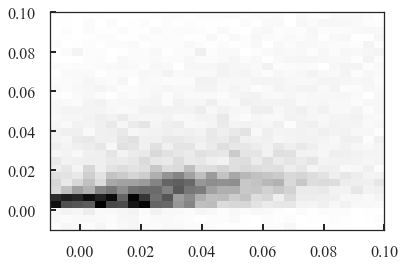

In [19]:
plt.hist2d(test.T[6],labelled_set['AK'],bins=30,range=[[-0.01,0.1],[-0.01,0.1]]);

In [20]:
m = pd.read_hdf('/data/jls/GaiaDR2/spectro/lamost_cannon/LAMOST_results.hdf5')

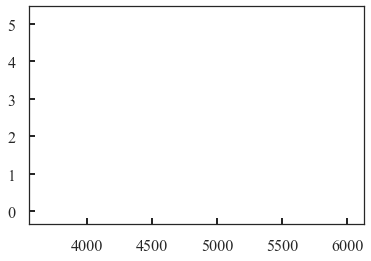

In [21]:
plt.plot(m.TEFF[m.r_chi_sq<3.],m.LOGG[m.r_chi_sq<3.],'.',ms=0.12)

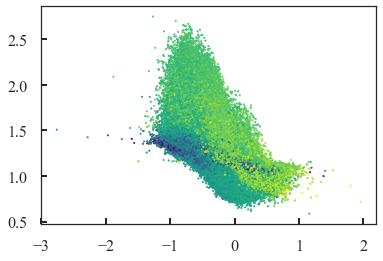

In [22]:
plt.scatter(m.C_M-m.N_M,m.mass,c=m.LOGG,cmap=plt.cm.viridis,s=2,vmin=0.,vmax=4.)

In [ ]:
apogee = 

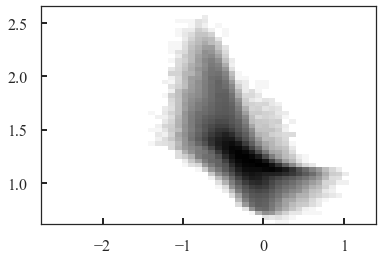

In [58]:
plt.hist2d((m.C_M-m.N_M)[fltr],
            m.mass[fltr],bins=50,norm=LogNorm());

In [40]:
len(m)

717359

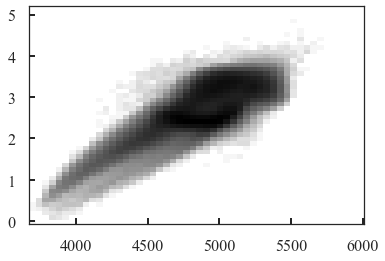

In [43]:
plt.hist2d(m.TEFF[m.r_chi_sq<3.],
            m.LOGG[m.r_chi_sq<3.],bins=50,norm=LogNorm());

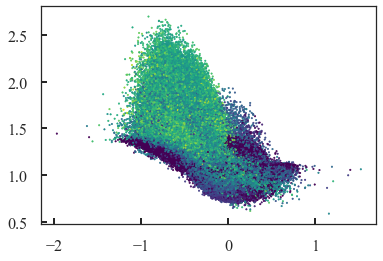

In [44]:
plt.scatter((m.C_M-m.N_M)[m.C_M_ERR_SNR<0.1],
            m.mass[m.C_M_ERR_SNR<0.1],
            c=m.M_H[m.C_M_ERR_SNR<0.1],cmap=plt.cm.viridis,s=2,vmin=-1.,vmax=0.7)

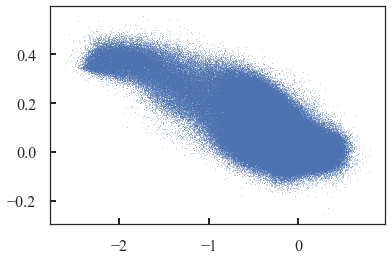

In [24]:
plt.plot(m.M_H[m.r_chi_sq<3.],m.ALPHA_M[m.r_chi_sq<3.],'.',ms=1)

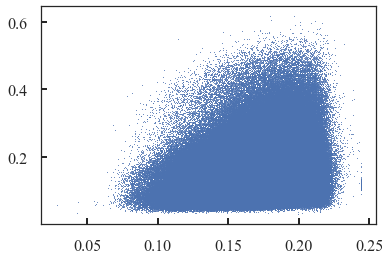

In [25]:
plt.plot(np.sqrt(m.C_M_ERR_SNR**2+m.N_M_ERR_SNR**2),m.mass_error,'.',ms=2)

(array([ 46088., 356443., 184737.,  61584.,  25958.,  12868.,   7613.,
          4827.,   3426.,   2378.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

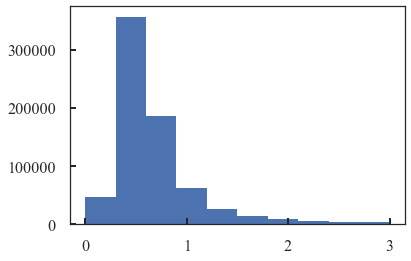

In [26]:
plt.hist(m.r_chi_sq,range=[0.,3.])

<Container object of 3 artists>

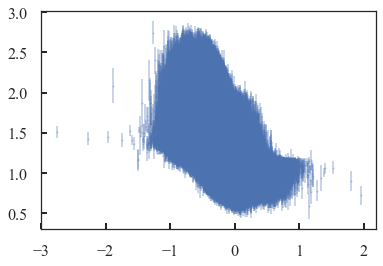

In [27]:
plt.errorbar(m.C_M-m.N_M,m.mass,m.mass_error,fmt='o',ms=2, alpha=0.3)

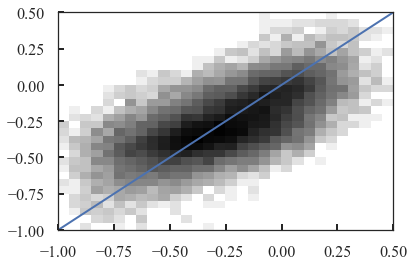

In [28]:
xx = np.linspace(-1.,0.5)
plt.hist2d(test.T[4]-test.T[5],labelled_set['C_M']-labelled_set['N_M'],
           bins=30,range=[[-1.,0.5],[-1.,0.5]],
           norm=LogNorm()
          );
plt.plot(xx,xx)

In [29]:
from plotting_general import running_median

[ 2.33069360e+02  3.23737698e-01 -3.45668541e-05]
[4.34346119e-01 2.84945548e-01 2.51752063e-06]
[0.79228514 0.52887269 2.11444907]
[ 0.09305232  0.19985991 -0.00039539]
[2.94660978 0.64804297 4.71707655]
[11.68214502  0.74178743  7.54575714]
[0.09655162 0.16942847 0.000784  ]


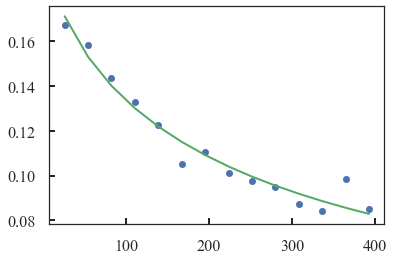

In [30]:
from scipy.optimize import leastsq
for i,n in enumerate(['TEFF','LOGG','M_H','ALPHA_M','C_M','N_M','AK']):
    r = running_median(snr, test.T[i]-labelled_set[n])
    std = .5*(r[3]-r[2])
    bin_centres = r[0]
    def fn(p):
        return std - p[0] / (np.power(bin_centres,p[1])+p[2]**2)
    p = leastsq(fn, [1.,.5,.2])[0]
    print p
#     plt.plot(r[0],.5*(r[3]-r[2])/(.5*(r[3]-r[2]))[0],'.')
#     plt.plot(r[0],p[0]/(np.power(r[0],p[1])+p[2]**2)/(p[0]/(np.power(r[0][0],p[1])+p[2]**2)))
    if i==5:
        plt.plot(r[0],.5*(r[3]-r[2]),'.')
        plt.plot(r[0],p[0]/(np.power(r[0],p[1])+p[2]**2))